## Keras Functional API

<br>

- Sequential API보다 더 유연한 모델을 만들 수 있음.
- 딥 러닝 모델은 일반적으로 레이어의 DAG (Directed Acyclic Graph). Functional API는 레이어의 그래프를 빌드.

In [1]:
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

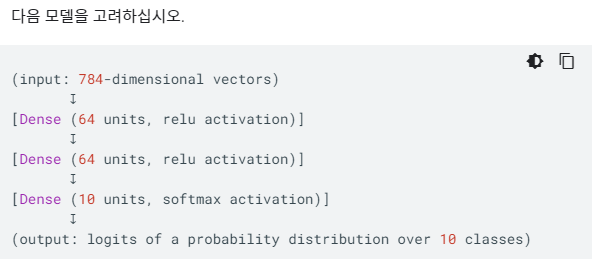

이런 모형을 어떻게 만들 수 있을까?

In [3]:
# 먼저 입력 노드를 작성하자.
# 이미지 입력이라면 shape=(32, 32, 3) 가 될 것.
inputs = keras.Input(shape=(784, )) # 784 차원 벡터.


inputs.shape

TensorShape([None, 784])

3:36: E261 at least two spaces before inline comment


In [4]:
# 이 inputs 객체에서 레이어를 호출해 그래프에서 새 노드를 만들자.
# inputs가 데이터를 dense로 전달하고, dense는 출력으로 x를 내놓는다.
dense = layers.Dense(64, activation='relu')
x = dense(inputs)

In [5]:
# 레이어를 좀 더 추가해보자.
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10)(x)

In [6]:
# inputs 랑 outputs를 통해 model을 작성할 수있다.
model = keras.Model(inputs=inputs, outputs=outputs, name='simple_mnist_model')
model.summary()

Model: "simple_mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


**오**  <br>
- 앞서 했던 것 처럼 model 만든 후 layer를 하나씩 추가한 것과 뭐가 다를까
    1. **input을 먼저 정의**한 다음 
    2. 이를 활용한 층을 만들고 (**input과 연결되는 층**을 만들고)
    3. **해당 층이랑 연결되는 다른 층**을 또 만들고
    4. **마지막으로 만든 층이랑 연결되는 outputs층**을 만들었다.
    5. model 생성은 **inputs와 outputs만 가지고 만들었음!**

***생성한 모델을 그래프로 표현해 볼 수도 있다.***

In [9]:
keras.utils.plot_model(model)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [10]:
!pip install pydot
!pip install graphviz

In [7]:
# 그래프 시각화를 위해 import.
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

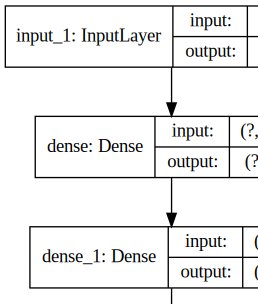

In [11]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg')) # 이건 왜 짤릴까

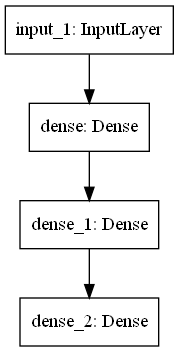

In [12]:
keras.utils.plot_model(model)

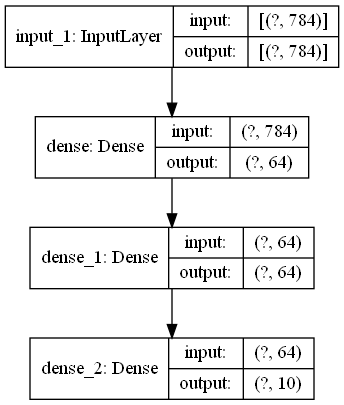

1:49: E203 whitespace before ','
1:50: E231 missing whitespace after ','


In [15]:
keras.utils.plot_model(model, 'myFirstModel.png' ,show_shapes=True)

SVG로 그리는 것 보다 이게 훨씬 나은 것 같다.  <br>

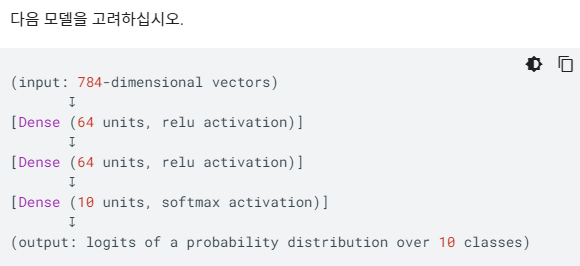

<br>

동일하다.  <br>
단지 코드에선 연결 화살표가 호출 작업으로 대체되었음.

## Simple MNIST Example

<br>

- 훈련, 평가, 추론은 Sequential 모형과 같이 함수형 API를 사용.
- Model 클래스는 내장으로 훈련 loop인 fit(), 평가 loop인 evaluate()를 가지고 있음.
    - 이런 루프를 이렇게 저렇게 잘 만들면 GAN 같은 구조도 만들수가 있다.

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
# 역시 예제 데이터라 아주 깔끔하게 분할되어있다.

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [20]:
# 입력 특성 차원 변경.
x_train = x_train.reshape(60000, 28*28).astype('float32') / 255
x_test = x_test.reshape(10000, 28*28).astype('float32') / 255

In [21]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


**앞서 만든 model을 써서 훈련 진행**

In [22]:
# 진행에 앞서 파라미터 갱신 방법 등과 같은 훈련 방법 정의.
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

2:9: E251 unexpected spaces around keyword / parameter equals
2:11: E251 unexpected spaces around keyword / parameter equals


In [24]:
# 훈련시켜 보자.
history = model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)

# 훈련시킨 모델을 평가해보자.
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test Loss : ', test_scores[0])
print('Test Accuracy : ', test_scores[1])

Epoch 1/3
750/750 [==============================] - 1s 1ms/step - loss: 0.0917 - accuracy: 0.9724 - val_loss: 0.1066 - val_accuracy: 0.9692
Epoch 2/3
750/750 [==============================] - 1s 1ms/step - loss: 0.0746 - accuracy: 0.9777 - val_loss: 0.1047 - val_accuracy: 0.9697
Epoch 3/3
750/750 [==============================] - 1s 1ms/step - loss: 0.0623 - accuracy: 0.9809 - val_loss: 0.1013 - val_accuracy: 0.9697
313/313 - 0s - loss: 0.0931 - accuracy: 0.9719


2:80: E501 line too long (84 > 79 characters)


Test Loss :  0.09311600774526596
Test Accuracy :  0.9718999862670898


    위 자세한 내용은 3. Train and Evaluate 에서 다시 보자.
    https://www.tensorflow.org/guide/keras/train_and_evaluate/?hl=ko

## 모델의 저장, 직렬화

<br>

- 함수형 API를 사용해 빌드된 모델에 대해 같은 방식으로 작동.
- 일반적으로 model.save()를 호출해 전체 모델을 단일 파일로 저장함. 파일엔 다음의 내용이 포함됨.
    - 모델 구조 (아키텍처)
    - 모델에서의 weights 값 (훈련 중 학습된 값)
    - 모델의 훈련 구성 (compile에서 구성한 내용.) (이미 있는 경우 compile로 전달함.)
    - Optimizer 및 상태 (이미 있는 경우, 중단된 곳에서 훈련을 다시 시작함.)

In [25]:
model.save('SavedModels/myFirstModel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: SavedModels/myFirstModel\assets


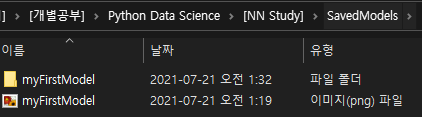 

오....

In [26]:
# 그럼 모델을 지우고 다시 동일한 모델을 불러와보자.
del model

In [27]:
model = keras.models.load_model('SavedModels/myFirstModel')

In [30]:
history2 = model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)

# 훈련시킨 모델을 평가해보자.
test_scores2 = model.evaluate(x_test, y_test, verbose=2)
print('Test Loss : ', test_scores2[0])
print('Test Accuracy : ', test_scores2[1])

Epoch 1/3
750/750 [==============================] - 1s 1ms/step - loss: 0.0189 - accuracy: 0.0987 - val_loss: 0.1146 - val_accuracy: 0.0997
Epoch 2/3
750/750 [==============================] - 1s 1ms/step - loss: 0.0176 - accuracy: 0.0986 - val_loss: 0.1210 - val_accuracy: 0.0980
Epoch 3/3
750/750 [==============================] - 1s 1ms/step - loss: 0.0192 - accuracy: 0.0987 - val_loss: 0.1080 - val_accuracy: 0.0990
313/313 - 0s - loss: 0.0994 - accuracy: 0.0993
Test Loss :  0.09940139949321747
Test Accuracy :  0.09929999709129333


1:80: E501 line too long (85 > 79 characters)


    다시 불러와서 사용은 된다.
    근데 정확도랑 Loss가 왜 이꼴이지

**밑 내용들은 아직 접하기엔 무리가 많이 있어보인다...**

<br>

https://www.tensorflow.org/guide/keras/functional?hl=ko